# Importing The Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_iris

# to split the data
from sklearn.model_selection import train_test_split
# chossing the model
from sklearn.linear_model import LogisticRegression
# preformance score
from sklearn.metrics import accuracy_score 

# Importing the data

In [1]:
path = r'C:\Users\ABC\Desktop\All Taskss\Oasis Infobyte\Task 3\dataset\car data.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0



Display basic information about the dataset


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Display the first few rows of the dataset

In [11]:
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Assuming 'Price' is the target variable

In [10]:
target_variable = 'Price'

Select features (independent variables) and the target variable

In [16]:
features = data[['Year', 'Present_Price', 'Driven_kms', 'Transmission']]
target = data['Selling_Price']


Convert categorical variables into numerical representations

In [17]:
features = pd.get_dummies(features, columns=['Transmission'], drop_first=True)


Split the dataset into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Create a Linear Regression model

In [19]:
model = LinearRegression()

Train the model

In [20]:
model.fit(X_train, y_train)


LinearRegression()

Make predictions on the test set

In [21]:
predictions = model.predict(X_test)


Evaluate the model


In [22]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [23]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.4117169651113952
Mean Squared Error: 4.1023159812443675
R-squared: 0.8219139619560789


Visualize predictions vs. actual values

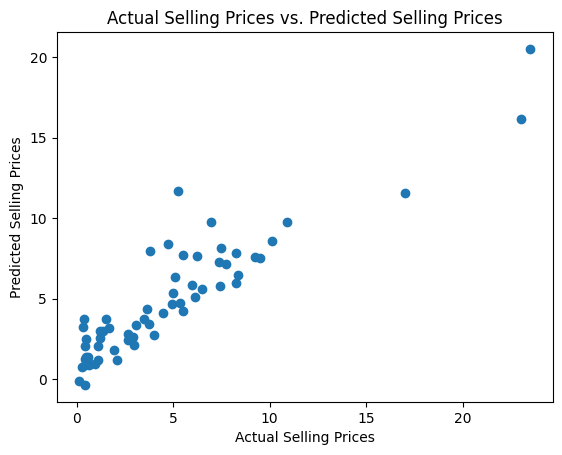

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual Selling Prices vs. Predicted Selling Prices')
plt.show()

In [25]:
import seaborn as sns

Box Plots for Categorical Features:

Box plots can provide insights into the distribution of numerical features grouped by categories.

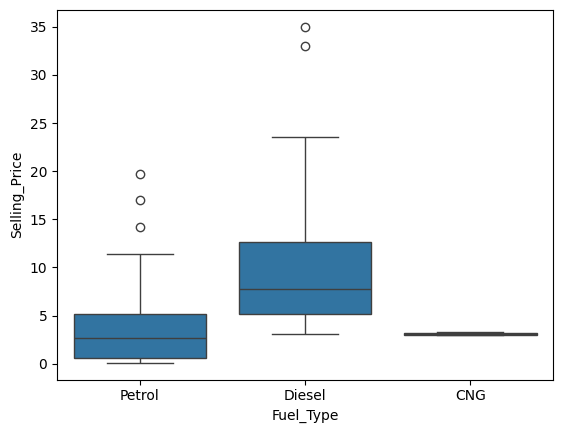

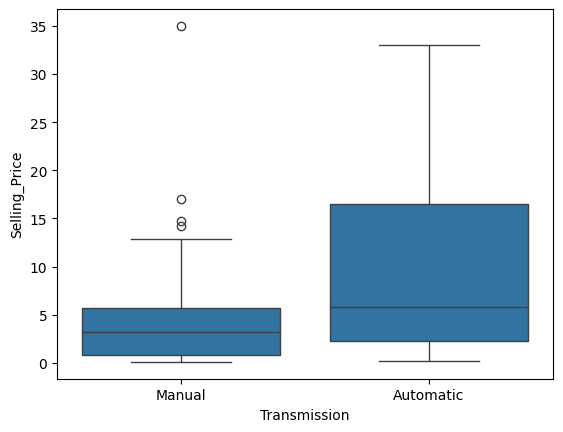

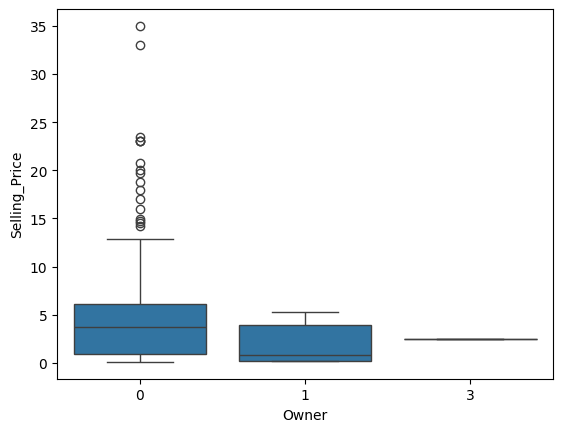

In [27]:
categorical_features = ['Fuel_Type', 'Transmission', 'Owner']
for feature in categorical_features:
    sns.boxplot(x=feature, y='Selling_Price', data=data)
    plt.show()


Residual Plot:

A residual plot can help you evaluate the model's performance by visualizing the differences between predicted and actual values.

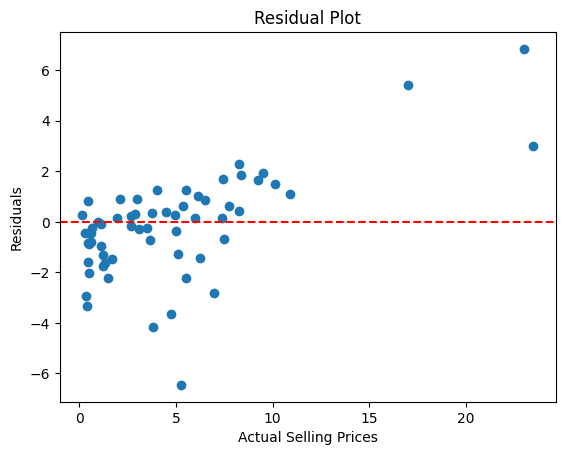

In [30]:
residuals = y_test - predictions
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
